## Yelp Challenge Dataset
The data is provided by Yelp as a call to programmers to research and manipulate to find new trends. As of now the challenge is completed but I still choose to explore the data. The data is presented in several JSON files and the identities of the businesses and users are replaced with randomly gennerated IDs to provide a sense of anonymity.

### Problem Statement
My goals are to analyze the most important features in a successful business in Las Vegas through reviews and user response. I will also use Natural Language Processing to conduct sentiment analysis on reviews for Las Vegas businesses.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import sqlalchemy
import matplotlib.pyplot as plt
%matplotlib inline

This code is to correct the error of "Trailing Data" in the json files. It strips the characters that are preventing the data from being read and then reads the stripped data into a data frame.

In [9]:
# read the entire file into a python array
with open('/Users/tony/Documents/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

data_json_str = "[" + ','.join(data) + "]"

user_df = pd.read_json(data_json_str)

In [10]:
user_df.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 167, u'useful': 282, u'cool': 246}",2004-10
1,3.67,"{u'profile': 117, u'cute': 204, u'funny': 594,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1345,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1292,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 8399, u'useful': 15242, u'cool': 12...",2004-10
2,3.68,"{u'profile': 9, u'cute': 22, u'funny': 96, u'p...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",105,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,395,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 722, u'useful': 1349, u'cool': 657}",2004-10
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",2004-10
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],5,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 13, u'useful': 37, u'cool': 16}",2004-10


repeat with each dataset.

In [11]:
with open('/Users/tony/Documents/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_tip.json', 'rb') as f:
    data = f.readlines()

data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

tip_df = pd.read_json(data_json_str)

In [12]:
tip_df.head()

,business_id,date,likes,text,type,user_id
0,5UmKMjUEUNdYWqANhGckJw,2016-07-17,0,Pizza is garbage. Hoagies are excellent.,tip,ZxdojCZgZhw36xuSGaryRg
1,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
2,mVHrayjG3uZ_RLHkLj-AMg,2016-02-22,0,Not easy to find. Be sure to put in directions...,tip,5OumCBQ_MyQsltSdbMyunA
3,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw
4,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,tip,xb6zEQCw9I-Gl0g06e1KsQ


In [13]:
with open('/Users/tony/Documents/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json', 'rb') as f:
    data = f.readlines()

data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

checkin_df = pd.read_json(data_json_str)

In [14]:
checkin_df.head()

,business_id,checkin_info,type
0,cE27W9VPgO88Qxe4ol6y_g,"{u'9-5': 1, u'7-5': 1, u'13-3': 1, u'17-6': 1,...",checkin
1,mVHrayjG3uZ_RLHkLj-AMg,"{u'11-5': 1, u'9-5': 2, u'9-4': 3, u'15-1': 1,...",checkin
2,mYSpR_SLPgUVymYOvTQd_Q,"{u'5-5': 1, u'5-4': 1, u'9-3': 1, u'11-4': 1, ...",checkin
3,KayYbHCt-RkbGcPdGOThNg,"{u'23-1': 1, u'11-2': 2, u'21-4': 1, u'16-1': ...",checkin
4,b12U9TFESStdy7CsTtcOeg,"{u'5-5': 2, u'13-2': 1, u'8-6': 1, u'5-1': 2, ...",checkin


In [15]:
with open('/Users/tony/Documents/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()

data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

business_df = pd.read_json(data_json_str)

In [21]:
business_df.attributes

0        {u'Take-out': True, u'Drive-Thru': False, u'Ou...
1        {u'Happy Hour': True, u'Accepts Credit Cards':...
2                                 {u'Good for Kids': True}
3        {u'Alcohol': u'full_bar', u'Noise Level': u'av...
4        {u'Takes Reservations': True, u'Accepts Credit...
5        {u'Alcohol': u'full_bar', u'Noise Level': u'lo...
6                          {u'Accepts Credit Cards': True}
7                                 {u'Good for Kids': True}
8                                                       {}
9                                                       {}
10                                     {u'Wi-Fi': u'free'}
11                                                      {}
12       {u'Take-out': True, u'Drive-Thru': False, u'Ou...
13       {u'Price Range': 1, u'Take-out': True, u'Accep...
14                                                      {}
15                         {u'Accepts Credit Cards': True}
16                                                      

In [5]:
business_df.to_csv('/Users/tony/Documents/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.csv', encoding='utf-8')

In [6]:
with open('/Users/tony/Documents/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json', 'rb') as f:
    data = f.readlines()

data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

review_df = pd.read_json(data_json_str)

In [7]:
review_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{u'funny': 0, u'useful': 0, u'cool': 0}"
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{u'funny': 1, u'useful': 1, u'cool': 0}"
3,5UmKMjUEUNdYWqANhGckJw,2015-12-26,pVMIt0a_QsKtuDfWVfSk2A,3,PROS: Italian hoagie was delicious. Friendly ...,review,qiczib2fO_1VBG8IoCGvVg,"{u'funny': 0, u'useful': 0, u'cool': 0}"
4,5UmKMjUEUNdYWqANhGckJw,2016-04-08,AEyiQ_Y44isJmNbMTyoMKQ,2,First the only reason this place could possibl...,review,qEE5EvV-f-s7yHC0Z4ydJQ,"{u'funny': 0, u'useful': 1, u'cool': 0}"


In [8]:
review_df.to_csv('/Users/tony/Documents/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.csv', encoding='utf-8')

In [8]:
user_df.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 167, u'useful': 282, u'cool': 246}",2004-10
1,3.67,"{u'profile': 117, u'cute': 204, u'funny': 594,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1345,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1292,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 8399, u'useful': 15242, u'cool': 12...",2004-10
2,3.68,"{u'profile': 9, u'cute': 22, u'funny': 96, u'p...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",105,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,395,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 722, u'useful': 1349, u'cool': 657}",2004-10
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",2004-10
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],5,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 13, u'useful': 37, u'cool': 16}",2004-10


In [9]:
user_df.dtypes

average_stars    float64
compliments       object
elite             object
fans               int64
friends           object
name              object
review_count       int64
type              object
user_id           object
votes             object
yelping_since     object
dtype: object

In [10]:
user_df.count()

average_stars    686556
compliments      686556
elite            686556
fans             686556
friends          686556
name             686556
review_count     686556
type             686556
user_id          686556
votes            686556
yelping_since    686556
dtype: int64

In [11]:
user_df['yelping_since']=pd.to_datetime(user_df['yelping_since'], format='%Y-%m')

In [12]:
users=pd.DataFrame(data=user_df,columns=['average_stars', 'fans', 'review_count', 'votes', 'yelping_since'])

In [13]:
users.to_csv('users.csv', encoding='utf-8')

In [14]:
complimentslst=[]
for i in user_df['compliments']:
    complimentslst.append(i)

In [15]:
compliments=pd.DataFrame(complimentslst)

In [16]:
compliments.head()

,cool,cute,funny,hot,list,more,note,photos,plain,profile,writer
0,76.0,15.0,11.0,48.0,NaN,3.0,20.0,14.0,25.0,8.0,9.0
1,1675.0,204.0,594.0,1111.0,38.0,137.0,611.0,361.0,970.0,117.0,346.0
2,134.0,22.0,96.0,99.0,4.0,18.0,79.0,27.0,86.0,9.0,24.0
3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2.0,NaN,1.0,NaN,1.0,1.0,NaN,2.0,NaN,2.0


In [17]:
fill_comp=compliments.fillna(value=0.0)
fill_comp.head()

,cool,cute,funny,hot,list,more,note,photos,plain,profile,writer
0,76.0,15.0,11.0,48.0,0.0,3.0,20.0,14.0,25.0,8.0,9.0
1,1675.0,204.0,594.0,1111.0,38.0,137.0,611.0,361.0,970.0,117.0,346.0
2,134.0,22.0,96.0,99.0,4.0,18.0,79.0,27.0,86.0,9.0,24.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0


In [18]:
tip_df.head()

,business_id,date,likes,text,type,user_id
0,5UmKMjUEUNdYWqANhGckJw,2016-07-17,0,Pizza is garbage. Hoagies are excellent.,tip,ZxdojCZgZhw36xuSGaryRg
1,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
2,mVHrayjG3uZ_RLHkLj-AMg,2016-02-22,0,Not easy to find. Be sure to put in directions...,tip,5OumCBQ_MyQsltSdbMyunA
3,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw
4,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,tip,xb6zEQCw9I-Gl0g06e1KsQ


In [19]:
tip_df.dtypes

business_id            object
date           datetime64[ns]
likes                   int64
text                   object
type                   object
user_id                object
dtype: object

In [23]:
Nevada= business_df[business_df['state']=='NV']

In [24]:
Nevada.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
8411,{},JiA2Q-APw1hBiLBKZv3LKA,[],Blue Diamond,"8000 Blue Diamond Rd\nSouthwest\nBlue Diamond,...",{},36.020636,-115.299037,Spring Mountain Ranch,[Southwest],True,3,4.5,NV,business
8412,"{u'Price Range': 2, u'Take-out': False, u'Acce...",IjcKyB-LUnev2iapzyJ11w,"[Food, Grocery, Shopping, Drugstores]",Henderson,"1000 N Green Valley Pkwy\nHenderson, NV 89012",{},36.027902,-115.084131,Smith's Food & Drug Stores,[],True,28,3.5,NV,business
8413,"{u'Take-out': True, u'Accepts Credit Cards': T...",Y3jVDgLRULH52M4_fXQOug,"[Burgers, Fast Food, Restaurants]",Henderson,"65 S Valle Verde Dr\nHenderson, NV 89012",{},36.025017,-115.063136,McDonald's,[],True,33,2.0,NV,business
8414,"{u'Good for Kids': True, u'Parking': {u'garage...",SP5yg5966RD-1qcgYmDGdg,"[Active Life, Golf]",Henderson,"2020 W Horizon Ridge Pkwy\nHenderson, NV 89012","{u'Monday': {u'close': u'18:00', u'open': u'06...",36.006516,-115.076652,Desert Willow Golf Course,[],True,24,4.0,NV,business
8415,"{u'By Appointment Only': False, u'Accepts Cred...",fItrFDQAb2Kz7wpnNz3XKA,"[Home Services, Real Estate, Apartments]",Henderson,"595 S Green Valley Pkwy\nAnthem\nHenderson, NV...","{u'Monday': {u'close': u'18:00', u'open': u'08...",36.007013,-115.085437,Horizon Ridge Apartments,[Anthem],True,6,2.5,NV,business


In [25]:
plotme=pd.DataFrame(data=Nevada, columns=['latitude', 'longitude','name', 'review_count', 'stars'])


In [26]:
plotme.to_csv('business_data.csv', encoding='utf-8')

In [28]:
business_df['categories'].value_counts

<bound method Series.value_counts of 0                                 [Fast Food, Restaurants]
1                                              [Nightlife]
2                           [Active Life, Mini Golf, Golf]
3        [Bars, American (New), Nightlife, Lounges, Res...
4                                      [Active Life, Golf]
5        [Bars, American (Traditional), Nightlife, Rest...
6                         [Auto Repair, Automotive, Tires]
7                                 [Active Life, Mini Golf]
8        [Roofing, Home Services, Decks & Railing, Cont...
9                                    [Veterinarians, Pets]
10               [Libraries, Public Services & Government]
11                     [Automotive, Auto Parts & Supplies]
12       [Burgers, Breakfast & Brunch, American (Tradit...
13                                         [Food, Grocery]
14                    [Automotive, Gas & Service Stations]
15       [Local Services, Dry Cleaning & Laundry, Sewin...
16                 

In [31]:
bleh=tip_df['user_id'].value_counts()

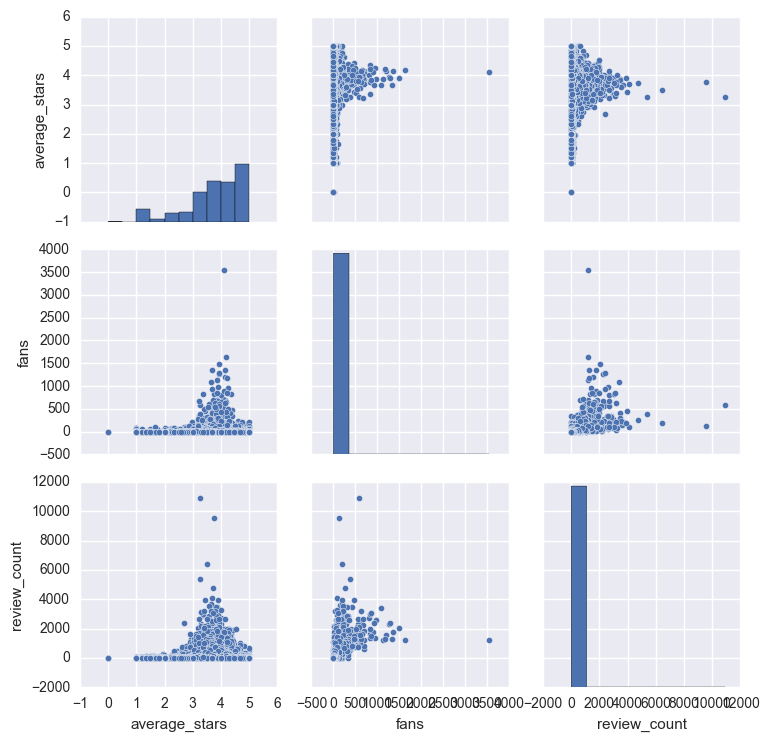

In [32]:
sns.pairplot(users)

In [33]:
sirtipsalot= tip_df[tip_df['user_id']=='QMTQNQmp4hQ2o6hkRX_Uxg']
sirtipsalot[['text']]

,text
28737,Cool
28738,I just left the coach store. I had a blast!
29518,I'm lost
38434,Diamonds
43484,Gucci
50516,Mhm
50694,Cool property
50695,Looks nice
50866,Bring plenty of money!
50882,$$$$


In [34]:
business_df['state'].value_counts()

AZ     36500
NV     23591
NC      6835
QC      5591
PA      4086
EDH     3297
WI      3066
BW      1055
IL       808
ON       530
SC       325
MLN      161
RP        18
ELN       11
FIF        5
CA         4
TX         3
SCB        2
FL         2
HAM        1
AL         1
MN         1
AK         1
NW         1
NM         1
XGL        1
TAM        1
NTH        1
KHL        1
           1
Name: state, dtype: int64

In [22]:
Nevada= business_df[business_df['state']=='NV']
Nevada.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
7849,"{u'Price Range': 1, u'Accepts Credit Cards': T...",IjcKyB-LUnev2iapzyJ11w,"[Food, Grocery, Shopping, Drugstores]",Henderson,"1000 N Green Valley Pkwy\nHenderson, NV 89012",{},36.003181,-115.083160,Smith's Food & Drug Stores,[],True,25,3.5,NV,business
7850,{u'By Appointment Only': True},M6BRkdFz51Auq5IosN1IQw,"[Oral Surgeons, Health & Medical, Dentists, Ge...",Henderson,"55 S Valle Verde Dr\nSte 250\nHenderson, NV 89012","{u'Monday': {u'close': u'18:00', u'open': u'08...",36.025742,-115.063659,"Benjamin Ilya, DMD",[],True,34,4.5,NV,business
7851,"{u'Take-out': True, u'Accepts Credit Cards': T...",Y3jVDgLRULH52M4_fXQOug,"[Burgers, Fast Food, Restaurants]",Henderson,"65 S Valle Verde Dr\nHenderson, NV 89012",{},36.025017,-115.063136,McDonald's,[],True,28,2.0,NV,business
7852,{u'Good for Kids': True},SP5yg5966RD-1qcgYmDGdg,"[Active Life, Golf]",Henderson,"2020 W Horizon Ridge Pkwy\nHenderson, NV 89012","{u'Monday': {u'close': u'18:00', u'open': u'06...",36.006516,-115.076652,Desert Willow Golf Course,[],True,24,4.0,NV,business
7853,{u'Accepts Credit Cards': True},fItrFDQAb2Kz7wpnNz3XKA,"[Home Services, Real Estate, Apartments]",Henderson,"595 S Green Valley Pkwy\nAnthem\nHenderson, NV...",{},36.007013,-115.085437,Horizon Ridge Apartments,[Anthem],True,5,2.5,NV,business


In [35]:
business_df[business_df['review_count']==5642]

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type


In [36]:
business_df[business_df['review_count']>=4000]

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
20187,"{u'Alcohol': u'full_bar', u'Open 24 Hours': Fa...",4bEjOyTaDG24SY5TxsaUNQ,"[Breakfast & Brunch, Steakhouses, French, Rest...",Las Vegas,"3655 Las Vegas Blvd S\nThe Strip\nLas Vegas, N...","{u'Monday': {u'close': u'23:00', u'open': u'07...",36.112952,-115.172589,Mon Ami Gabi,[The Strip],True,6200,4.0,NV,business
27816,"{u'Take-out': True, u'Accepts Credit Cards': T...",2e2e7WgqU1BnpxmQL5jbfw,"[Sandwiches, Restaurants]",Las Vegas,Planet Hollywood Resort & Casino\n3667 Las Veg...,"{u'Monday': {u'close': u'00:00', u'open': u'00...",36.109930,-115.170862,Earl of Sandwich,[The Strip],True,4687,4.5,NV,business
50493,"{u'Take-out': False, u'Accepts Credit Cards': ...",zt1TpTuJ6y9n551sw9TaEg,"[Breakfast & Brunch, Buffets, Restaurants]",Las Vegas,The Cosmopolitan of Las Vegas\n3708 Las Vegas ...,"{u'Monday': {u'close': u'21:00', u'open': u'17...",36.109876,-115.175164,Wicked Spoon,[The Strip],True,4967,3.5,NV,business
60454,"{u'Take-out': False, u'Accepts Credit Cards': ...",sIyHTizqAiGu12XMLX3N3g,"[Buffets, Restaurants]",Las Vegas,Caesars Palace Las Vegas Hotel And Casino\n357...,"{u'Monday': {u'close': u'22:00', u'open': u'07...",36.115854,-115.176174,Bacchanal Buffet,[The Strip],True,5216,4.0,NV,business
62785,"{u'Take-out': True, u'Accepts Credit Cards': T...",aGbjLWzcrnEx2ZmMCFm3EA,"[Burgers, Restaurants]",Las Vegas,Planet Hollywood Las Vegas Resort & Casino\n36...,"{u'Monday': {u'close': u'00:00', u'open': u'11...",36.110108,-115.172338,Gordon Ramsay BurGR,[The Strip],True,4620,4.0,NV,business


In [37]:
Nevada['stars'].value_counts()

4.0    4457
3.5    4397
5.0    3897
4.5    3674
3.0    3067
2.5    2105
2.0    1098
1.5     566
1.0     330
Name: stars, dtype: int64

In [38]:
LV=Nevada[Nevada['city']=='Las Vegas']
LV.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
8420,"{u'By Appointment Only': True, u'Accepts Insur...",F7l0UuTvf_734UMAwsJfkg,"[Doctors, Medical Centers, Health & Medical, F...",Las Vegas,"1701 Bearden Dr\nDowntown\nLas Vegas, NV 89106",{},36.161517,-115.164011,Apex Medical Center,[Downtown],True,4,3.0,NV,business
8426,"{u'Price Range': 2, u'Accepts Credit Cards': T...",uzztTCsg3XAKlYqmLO40aw,"[Books, Mags, Music & Video, Shopping, Booksto...",Las Vegas,"5835 S Eastern Ave\nSoutheast\nLas Vegas, NV 8...","{u'Monday': {u'close': u'22:00', u'open': u'10...",36.083936,-115.119422,Psychic Eye Book Shops,[Southeast],True,20,4.0,NV,business
8439,"{u'By Appointment Only': False, u'Accepts Cred...",YWLO4XUYsyMyEc0ciUAp0Q,"[Home Services, Real Estate, Apartments]",Las Vegas,"80 South Gibson Rd\nLas Vegas, NV 89012","{u'Monday': {u'close': u'18:00', u'open': u'09...",36.030471,-115.027479,Timberlake,[],False,11,3.0,NV,business
8445,"{u'Price Range': 2, u'Accepts Credit Cards': T...",IspFZDcpu9W5NvvJ7QgJZg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Las Vegas,The Forum Shops At Caesars\n3500 Las Vegas Blv...,"{u'Monday': {u'close': u'23:00', u'open': u'10...",36.119037,-115.173219,Gap,[The Strip],True,8,4.5,NV,business
8450,"{u'By Appointment Only': False, u'Accepts Cred...",Dvulg9cc3XHkt5DkBUekhw,"[Hair Salons, Beauty & Spas]",Las Vegas,467 E Silverado Ranch Blvd\nSte 175\nSoutheast...,"{u'Monday': {u'close': u'21:00', u'open': u'09...",36.012518,-115.152650,Great Clips,[Southeast],True,17,2.5,NV,business


In [39]:
LV[LV['review_count']>=125]

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
8718,"{u'Accepts Credit Cards': True, u'Good for Kid...",I83NNRHZRQZiCPcd9QzC5w,"[Arts & Entertainment, Casinos]",Las Vegas,"4111 Boulder Hwy\nLas Vegas, NV 89121","{u'Monday': {u'close': u'00:00', u'open': u'00...",36.133052,-115.084902,Boulder Station Hotel & Casino,[],True,200,3.0,NV,business
9093,"{u'Accepts Credit Cards': True, u'Price Range'...",VZyE9u5-gAG62zfe53hXWA,"[Bars, Nightlife, Lounges, Hotels & Travel, Ho...",Las Vegas,"1501 W Sahara Ave\nLas Vegas, NV 89102","{u'Monday': {u'close': u'00:00', u'open': u'00...",36.143672,-115.169792,Artisan Hotel Boutique,[],True,428,3.0,NV,business
9094,"{u'Take-out': True, u'Accepts Credit Cards': T...",AFDFOs2GaIyUArGyEUDQzQ,"[Noodles, Chinese, Restaurants]",Las Vegas,"4355 Spring Mountain Rd\nChinatown\nLas Vegas,...","{u'Monday': {u'close': u'02:00', u'open': u'11...",36.125908,-115.197904,Cafe Noodle & Chinese Barbeque,[Chinatown],True,206,3.0,NV,business
9095,"{u'Take-out': True, u'Accepts Credit Cards': T...",FV16IeXJp2W6pnghTz2FAw,"[Vietnamese, Chinese, Restaurants]",Las Vegas,"4029 Spring Mountain Rd\nChinatown\nLas Vegas,...","{u'Monday': {u'close': u'06:00', u'open': u'06...",36.126194,-115.193445,Pho Kim Long,[Chinatown],True,2142,3.5,NV,business
9135,"{u'Take-out': True, u'Accepts Credit Cards': T...",PsOvURXqpy8iZX2J8y429A,"[Seafood, American (Traditional), Restaurants]",Las Vegas,"2610 W. Sahara Ave.\nLas Vegas, NV 89102","{u'Monday': {u'close': u'21:30', u'open': u'11...",36.144732,-115.175756,Landry's Seafood,[],True,202,3.0,NV,business
9140,"{u'Take-out': True, u'Accepts Credit Cards': T...",Yq8LiVymGA7vBpGCQuDfRw,"[Vietnamese, Restaurants]",Las Vegas,"4745 Spring Mountain Rd\nChinatown\nLas Vegas,...","{u'Monday': {u'close': u'03:00', u'open': u'09...",36.124983,-115.206431,Pho So 1,[Chinatown],True,763,3.5,NV,business
9145,"{u'Alcohol': u'beer_and_wine', u'Noise Level':...",UKKz4HdQC0aH9j5lLi4u8Q,"[Korean, Barbeque, Restaurants]",Las Vegas,"3920 Spring Mountain Rd\nChinatown\nLas Vegas,...","{u'Monday': {u'close': u'02:00', u'open': u'11...",36.126761,-115.192874,Tofu Hut,[Chinatown],True,533,3.5,NV,business
9168,"{u'Noise Level': u'quiet', u'Has TV': False, u...",LM71VvmoAWDD5z8h7XoVig,"[Vegetarian, Indian, Vegan, Restaurants]",Las Vegas,"4604 W Sahara Ave\nSte 6\nWestside\nLas Vegas,...","{u'Monday': {u'close': u'21:00', u'open': u'11...",36.145118,-115.204720,Samosa Factory,[Westside],False,151,4.0,NV,business
9208,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",RfR5yc4j9coIPBuxRsOW8Q,"[Nightlife, Bars, Karaoke, Hawaiian, Restaurants]",Las Vegas,2605 S Decatur Blvd\nSte 109\nWestside\nLas Ve...,"{u'Monday': {u'close': u'03:00', u'open': u'08...",36.142970,-115.209350,Aloha Kitchen & Bar,[Westside],True,363,3.5,NV,business
9230,"{u'Delivery': True, u'Take-out': True, u'Accep...",cZxez9tUb9hqV3KXq5YPAQ,"[Indian, Restaurants]",Las Vegas,"2218 Paradise Rd\nThe Strip\nLas Vegas, NV 89104","{u'Monday': {u'close': u'22:30', u'open': u'17...",36.144700,-115.155176,India Oven,[The Strip],True,130,3.5,NV,business


In [40]:
attlst=[]
for i in LV['attributes']:
    attlst.append(i)

In [41]:
attributes=pd.DataFrame(attlst)
attributes.shape

(19326, 36)

In [42]:
attributes.count()

Accepts Credit Cards         14750
Accepts Insurance             1068
Ages Allowed                   124
Alcohol                       5270
Ambience                      4845
Attire                        4835
BYOB                           220
BYOB/Corkage                   329
By Appointment Only           4591
Caters                        3784
Coat Check                    1150
Corkage                        213
Delivery                      4993
Dietary Restrictions             9
Dogs Allowed                   949
Drive-Thru                     867
Good For                      4713
Good For Dancing              1209
Good For Groups               5665
Good for Kids                 6954
Hair Types Specialized In      144
Happy Hour                    1257
Has TV                        5115
Music                         1153
Noise Level                   4694
Open 24 Hours                   91
Order at Counter                94
Outdoor Seating               5746
Parking             

In [43]:
df = pd.DataFrame(data=attributes, columns=['Accepts Credit Cards', 'Alcohol', 'Price Range', 'Takes Reservations'])
df.head()

,Accepts Credit Cards,Alcohol,Price Range,Takes Reservations
0,NaN,NaN,NaN,NaN
1,True,NaN,2.0,NaN
2,True,NaN,NaN,NaN
3,True,NaN,2.0,NaN
4,True,NaN,1.0,NaN


In [44]:
attributes['Price Range']=attributes['Price Range'].fillna(value=0.0)

In [45]:
features = attributes.sum(axis=0)

features.sort_values(ascending = False).head(10)

Price Range    21274.0
dtype: float64

In [46]:
attributes['Price Range'].value_counts()

0.0    7654
2.0    6105
1.0    4026
3.0    1126
4.0     415
Name: Price Range, dtype: int64

In [48]:
hourslst=[]
for i in LV['hours']:
    hourslst.append(i)

In [49]:
hours=pd.DataFrame(hourslst)
hours.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{u'close': u'22:00', u'open': u'10:00'}","{u'close': u'22:00', u'open': u'10:00'}","{u'close': u'22:00', u'open': u'10:00'}","{u'close': u'20:00', u'open': u'11:00'}","{u'close': u'22:00', u'open': u'10:00'}","{u'close': u'22:00', u'open': u'10:00'}","{u'close': u'22:00', u'open': u'10:00'}"
2,"{u'close': u'18:00', u'open': u'09:00'}","{u'close': u'18:00', u'open': u'09:00'}","{u'close': u'17:00', u'open': u'10:00'}","{u'close': u'17:00', u'open': u'10:00'}","{u'close': u'18:00', u'open': u'09:00'}","{u'close': u'18:00', u'open': u'09:00'}","{u'close': u'18:00', u'open': u'09:00'}"
3,"{u'close': u'00:00', u'open': u'10:00'}","{u'close': u'23:00', u'open': u'10:00'}","{u'close': u'00:00', u'open': u'10:00'}","{u'close': u'23:00', u'open': u'10:00'}","{u'close': u'23:00', u'open': u'10:00'}","{u'close': u'23:00', u'open': u'10:00'}","{u'close': u'23:00', u'open': u'10:00'}"
4,"{u'close': u'21:00', u'open': u'09:00'}","{u'close': u'21:00', u'open': u'09:00'}","{u'close': u'19:00', u'open': u'09:00'}","{u'close': u'18:00', u'open': u'09:00'}","{u'close': u'21:00', u'open': u'09:00'}","{u'close': u'21:00', u'open': u'09:00'}","{u'close': u'21:00', u'open': u'09:00'}"


In [50]:
checkin_df.head()


,business_id,checkin_info,type
0,cE27W9VPgO88Qxe4ol6y_g,"{u'9-5': 1, u'7-5': 1, u'13-3': 1, u'17-6': 1,...",checkin
1,mVHrayjG3uZ_RLHkLj-AMg,"{u'11-5': 1, u'9-5': 2, u'9-4': 3, u'15-1': 1,...",checkin
2,mYSpR_SLPgUVymYOvTQd_Q,"{u'5-5': 1, u'5-4': 1, u'9-3': 1, u'11-4': 1, ...",checkin
3,KayYbHCt-RkbGcPdGOThNg,"{u'23-1': 1, u'11-2': 2, u'21-4': 1, u'16-1': ...",checkin
4,b12U9TFESStdy7CsTtcOeg,"{u'5-5': 2, u'13-2': 1, u'8-6': 1, u'5-1': 2, ...",checkin


In [51]:
checkin=[]
for i in checkin_df['checkin_info']:
    checkin.append(i)

In [52]:
checkin_times=pd.DataFrame(checkin)
checkin_times.describe()

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,1-0,1-1,1-2,...,8-4,8-5,8-6,9-0,9-1,9-2,9-3,9-4,9-5,9-6
count,3483.000000,3218.000000,3237.000000,3422.000000,3780.000000,4988.000000,5106.000000,2418.000000,2239.000000,2298.000000,...,12705.000000,14674.000000,11328.000000,14429.000000,14558.000000,15010.000000,14815.000000,16389.000000,18982.000000,14929.000000
mean,3.732989,3.162834,3.180105,3.353010,3.961905,5.821973,6.062671,3.105045,2.640911,2.638381,...,3.375679,3.982622,4.239936,3.161134,3.020676,3.009993,3.111711,3.324608,4.388526,4.915734
std,10.997541,8.380460,6.727111,7.889058,10.671259,17.907623,19.916613,7.633173,6.286477,4.570661,...,13.071169,11.923547,12.908469,11.103267,9.090285,8.776800,9.883738,10.733523,12.108312,14.179379
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
75%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
max,361.000000,217.000000,141.000000,176.000000,240.000000,416.000000,635.000000,186.000000,160.000000,57.000000,...,894.000000,750.000000,747.000000,807.000000,604.000000,591.000000,697.000000,772.000000,730.000000,834.000000


In [53]:
# We see that most traffic is between fri-Sun, during lunchtime 11:00am-01:00pm and 5:00pm-7:00 pm
most_traffic=checkin_times.sum(axis=0)
most_traffic.sort_values(ascending = False).head(10)

18-4    147943.0
12-5    147699.0
13-5    141825.0
18-5    139807.0
19-4    139160.0
12-6    135613.0
11-5    133486.0
17-4    131751.0
19-5    131343.0
17-5    129658.0
dtype: float64

In [54]:
user_df['yelping_since'].value_counts()

2014-07-01    11717
2014-08-01    10747
2013-08-01    10278
2014-06-01    10211
2014-05-01    10157
2013-07-01    10083
2013-06-01     9535
2011-07-01     9364
2014-03-01     9298
2013-05-01     9239
2015-03-01     9183
2015-01-01     9178
2012-07-01     9166
2012-10-01     9128
2013-01-01     9068
2013-03-01     9061
2015-07-01     8999
2014-10-01     8825
2014-04-01     8809
2012-09-01     8793
2011-08-01     8705
2014-01-01     8695
2013-09-01     8680
2012-08-01     8654
2013-04-01     8510
2012-06-01     8478
2011-06-01     8401
2011-03-01     8368
2015-02-01     8359
2014-09-01     8354
              ...  
2007-01-01      787
2007-03-01      783
2007-02-01      717
2006-08-01      577
2006-12-01      541
2006-10-01      492
2006-09-01      481
2006-11-01      423
2006-07-01      320
2006-06-01      279
2006-04-01      257
2006-03-01      249
2006-05-01      226
2006-01-01      203
2006-02-01      202
2005-12-01      125
2005-08-01       91
2005-11-01       75
2005-07-01       70


In [55]:
tip_df.head()

,business_id,date,likes,text,type,user_id
0,5UmKMjUEUNdYWqANhGckJw,2016-07-17,0,Pizza is garbage. Hoagies are excellent.,tip,ZxdojCZgZhw36xuSGaryRg
1,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
2,mVHrayjG3uZ_RLHkLj-AMg,2016-02-22,0,Not easy to find. Be sure to put in directions...,tip,5OumCBQ_MyQsltSdbMyunA
3,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw
4,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,tip,xb6zEQCw9I-Gl0g06e1KsQ


In [56]:
liked_tips=tip_df[tip_df['likes']>=4]

In [57]:
liked_tips['text']

33332     This drive-thru is sketchy and narrow. How do ...
72568     The workers are a little odd. Guy put my ice c...
97489     If you have any self respect, you should stay ...
102728    Wow where have I been?  They seem to have reno...
108902    Best authentic Chinese food in all of Henderso...
109011    "We like hot butter on our breakfast toast" \n...
122719                       This casino smells like PISS!!
149360    I only gambled $5 in the penny slots and I'm a...
150785    Tiffany..you have THE worst customer service E...
151102    I'm not sure if they have updated anything sin...
166059    There are no donuts here even though this plac...
184166    Heads up.... The sweet older couple who owned ...
184173    The owner of Baladie Cafe (Richie A) sent me a...
185844    License photographer assured me her photos alw...
192847    Apparently I did not get the memo to wear my d...
201669    Friends don't let friends eat here...unless it...
208722    Aw, man!  Costco swapped out t

In [58]:
cvec = CountVectorizer()
cvec.fit(liked_tips['text'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [59]:
cvec = CountVectorizer(stop_words='english',
                      ngram_range=(2, 2))
cvec.fit(liked_tips['text'])
len(cvec.get_feature_names())

636

In [60]:
tokens = pd.DataFrame(cvec.transform(liked_tips['text']).todense(),
                       columns=cvec.get_feature_names())
tokens.head()

,0221 nicely,1131 let,16 sucks,18 pizza,1977 toxic,20 minutes,25 small,28 ordered,331 1131,35 years,...,wouldn eat,wow renovated,wrote cool,wu purchased,xs ll,year ago,years longer,years metro,yelp don,yo fierce
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
word_counts = tokens.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

white rice           3
service questions    2
ll care              2
chinese food         2
care 562             2
contact vip          2
bottle service       2
free contact         2
just plain           2
fiery noodles        2
let party            2
vip guestlist        2
feel free            2
guestlist bottle     2
331 1131             2
562 331              2
1131 let             2
eating free          2
fridays food         1
future cds           1
dtype: int64